In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

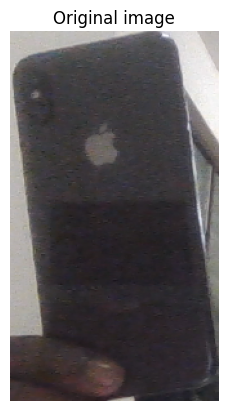

In [32]:
#skin color
image = cv2.imread('./../data/ObjectsDetected/2023-06-16/10827454/entry/cell phone.png')

#write image correctly
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title('Original image')
plt.axis('off')  # Optional: turn off axis labels and ticks
plt.show()

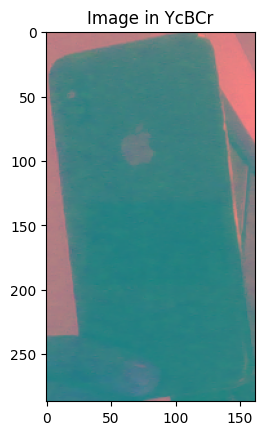

In [33]:

# Convert image to the YCbCr color space
ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)


plt.imshow(ycbcr_image)
plt.title("Image in YcBCr")
plt.axis('on')  # Optional: turn off axis labels and ticks
plt.show()

In [34]:
for i in range(100):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the skin color range
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    # Create a mask by thresholding the image based on the skin color range
    skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

    # Apply morphological operations to remove noise and refine the mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel, iterations=2)
    skin_mask = cv2.dilate(skin_mask, kernel, iterations=1)

    # Find contours in the skin mask
    contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours are found
    if contours:
        # Find the largest contour within the hand region
        largest_contour = max(contours, key=cv2.contourArea)

        # Create a mask for the largest contour (hand)
        hand_mask = np.zeros_like(skin_mask)
        cv2.drawContours(hand_mask, [largest_contour], 0, 255, cv2.FILLED)

        # Invert the hand mask to obtain a mask for the phone region
        phone_mask = cv2.bitwise_not(hand_mask)

        # Apply the inverted mask to the original image to extract the phone alone
        phone_image = cv2.bitwise_and(image, image, mask=phone_mask)

        # Display the phone image
        cv2.imshow('Phone Alone', phone_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("No hand contours found in the image.")

No hand contours found in the image.


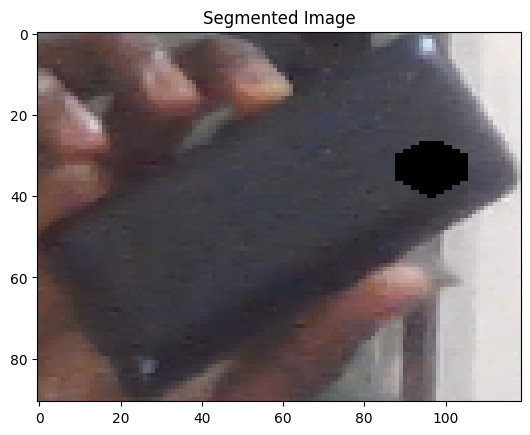